In [7]:
from tensors import *
import numpy as np
from nets import *
from layers import *
from dataloader import *
from optimizers import *
from utils import *
from loss import *
from tqdm import tqdm

In [2]:
class Net(NeuralNet):
    def __init__(self) -> None:
        super().__init__()
        self.d1, self.b1, self.r1 = Dense(1, 25), Bias(25), ReLU()
        self.d2, self.b2, self.r2 = Dense(25, 25), Bias(25), ReLU()
        self.d3, self.b3 = Dense(25, 1), Bias(1)

    def forward(self, input):
        x = self.r1(self.b1(self.d1(input)))
        x = self.r2(self.b2(self.d2(x)))
        x = self.b3(self.d3(x))
        return x
        
net = Net()

In [3]:
loss = MSE()
optim = Optimizer(net.parameters)

In [16]:
epochs = tqdm(range(100))
batch_size = 10
data_num = 1000
lr = .01

data = MathFunc(np.sin, -1.5 * np.pi, 1.5 * np.pi, data_num, batch_size)


for epoch in epochs:
    for x, y in data():
        optim.zero_grad()

        x, y = Tensor(x), Tensor(y)
        loss(net(x), y)

        loss.backward()
        optim.step(lr)
    epochs.set_description("Loss: {0}".format(np.round(loss.loss, 7)))

Loss: 0.0001235: 100%|██████████| 100/100 [00:13<00:00,  7.45it/s]


In [17]:
import matplotlib.pyplot as plt
plt.style.use("default")
plt.figure(figsize=(10, 16));

<Figure size 1000x1600 with 0 Axes>

In [18]:
x = np.linspace(-1.5*np.pi, 1.5*np.pi, 100)
y = np.sin(x)
y_hat = net(np.array(np.split(x, len(x))))

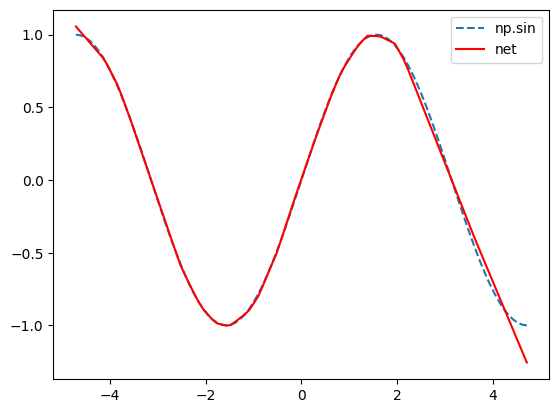

In [19]:
plt.plot(x, y, linestyle="--", label="np.sin")
plt.plot(x, y_hat, color="r", label="net")
plt.legend();